import packages

In [3]:
import os 
os.chdir(r'C:\users\admin\downloads')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

set dimensions for plot 

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

read the file

In [5]:
crop = pd.read_csv('cropyield.csv')

make copies

In [6]:
crop1=crop.copy()

structure of data

In [7]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


summarize the data 

In [8]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
crop['label'].describe()

count     2200
unique      22
top       rice
freq       100
Name: label, dtype: object

data cleaning /checking for missing values in each column

In [10]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

check for duplicates 

In [11]:
crop.duplicated().sum()

0

In [12]:
crop[crop.duplicated()]

,N,P,K,temperature,humidity,ph,rainfall,label


In [13]:
crops=crop['label'].value_counts()

In [14]:
print(crops)

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


visualizing the data

In [15]:
crop[['humidity','temperature','rainfall']].corr()

,humidity,temperature,rainfall
humidity,1.000000,0.205320,0.094423
temperature,0.205320,1.000000,-0.030084
rainfall,0.094423,-0.030084,1.000000


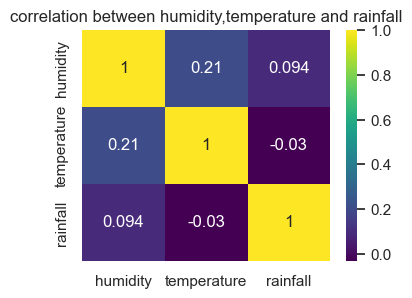

In [16]:
plt.figure(figsize=(4,3))
sns.heatmap(crop[['humidity','temperature','rainfall']].corr(),annot=True , cmap='viridis')
plt.title('correlation between humidity,temperature and rainfall')
plt.show()

In [17]:
crop[['N','P','K','ph']].corr()

,N,P,K,ph
N,1.000000,-0.231460,-0.140512,0.096683
P,-0.231460,1.000000,0.736232,-0.138019
K,-0.140512,0.736232,1.000000,-0.169503
ph,0.096683,-0.138019,-0.169503,1.000000


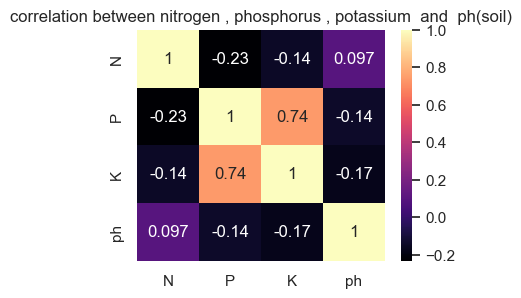

In [18]:
plt.figure(figsize=(4,3))
sns.heatmap(crop[['N','P','K','ph']].corr(),annot=True,cmap='magma')
plt.title('correlation between nitrogen , phosphorus , potassium  and  ph(soil)')
plt.show()

breaking down labels into sublabels

In [19]:
label_1=crop[crop['label'].isin(['rice','maize','jute','cotton'])]

In [20]:
label_2=crop[crop['label'].isin(['coconut','papaya','orange','apple','muskmelon','watermelon','grapes','mango','banana','pomegranate'])]

In [21]:
label_3=crop[crop['label'].isin(['lentil','blackgram','mungbean','mothbeans','pigeonpeas','kidneybeans','chickpea','coffee'])]

determining the best possible humidity and temperature for the above labels.

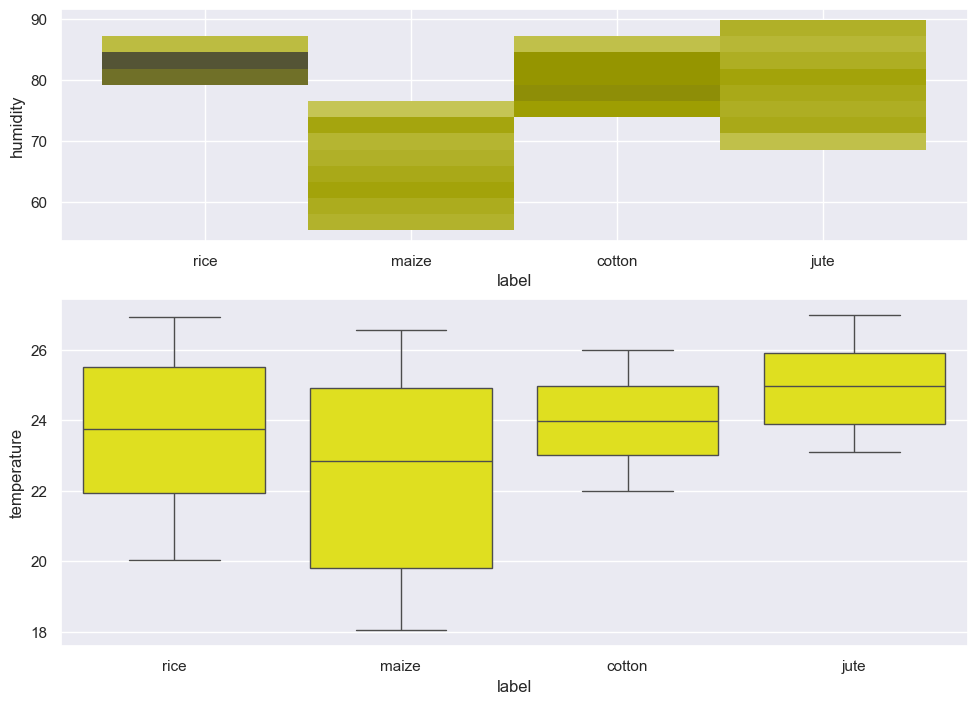

In [22]:
f,(ax_hist,ax_box)=plt.subplots(2,gridspec_kw={"height_ratios":(.40,.60)})
sns.histplot(x=label_1['label'],y=crop['humidity'],color='yellow',ax=ax_hist)
sns.boxplot(x=label_1['label'],y=crop['temperature'],color='yellow',ax=ax_box)
plt.show()

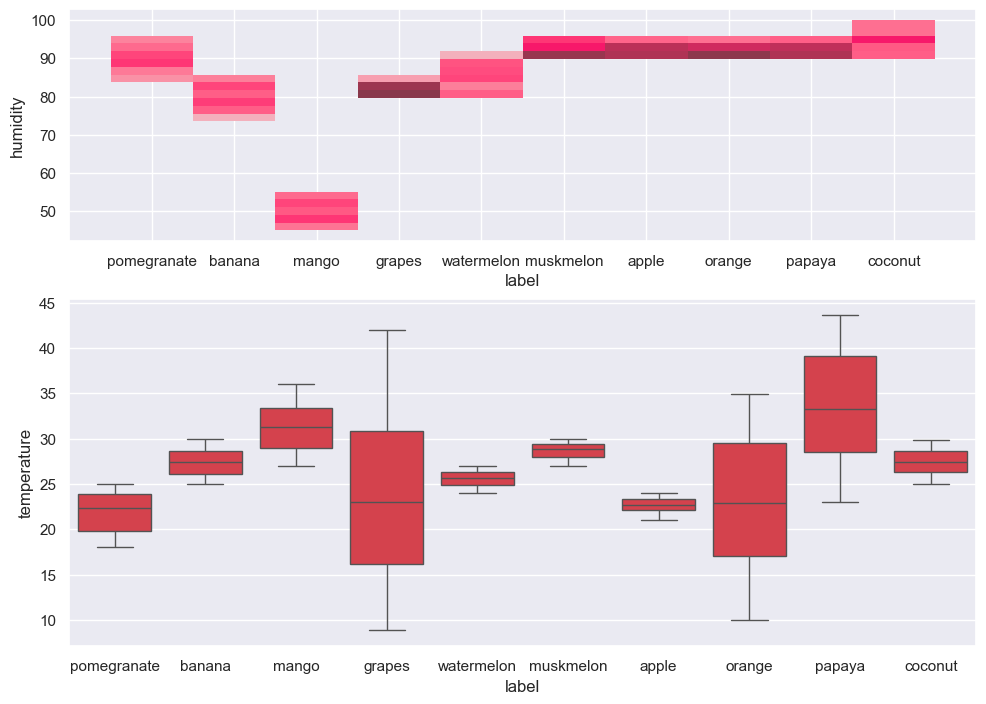

In [23]:
f,(ax_hist,ax_box)=plt.subplots(2,gridspec_kw={"height_ratios":(.40,.60)})
sns.histplot(x=label_2['label'],y=crop['humidity'],color='pink',ax=ax_hist)
sns.boxplot(x=label_2['label'],y=crop['temperature'],color='#ED2939',ax=ax_box)
plt.show()

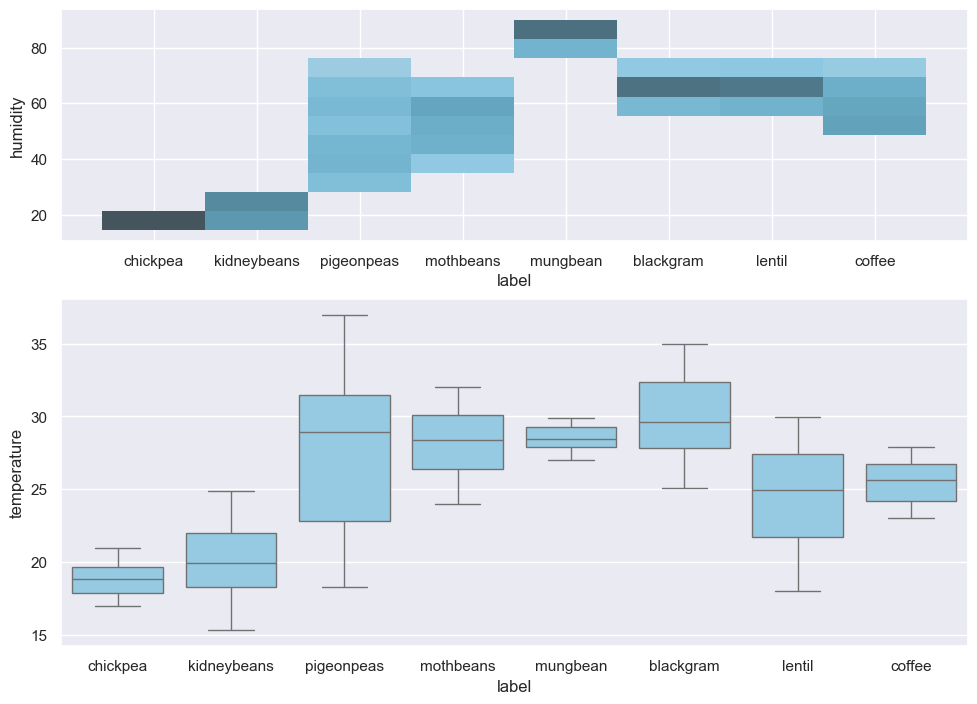

In [24]:
f,(ax_hist,ax_box)=plt.subplots(2,gridspec_kw={"height_ratios":(.40,.60)})
sns.histplot(x=label_3['label'],y=crop['humidity'],color='skyblue',ax=ax_hist)
sns.boxplot(x=label_3['label'],y=crop['temperature'],color='#89CFF0',ax=ax_box)
plt.show()

effect of Nitrogen, phosphorous,potassium and ph of soil on different crops

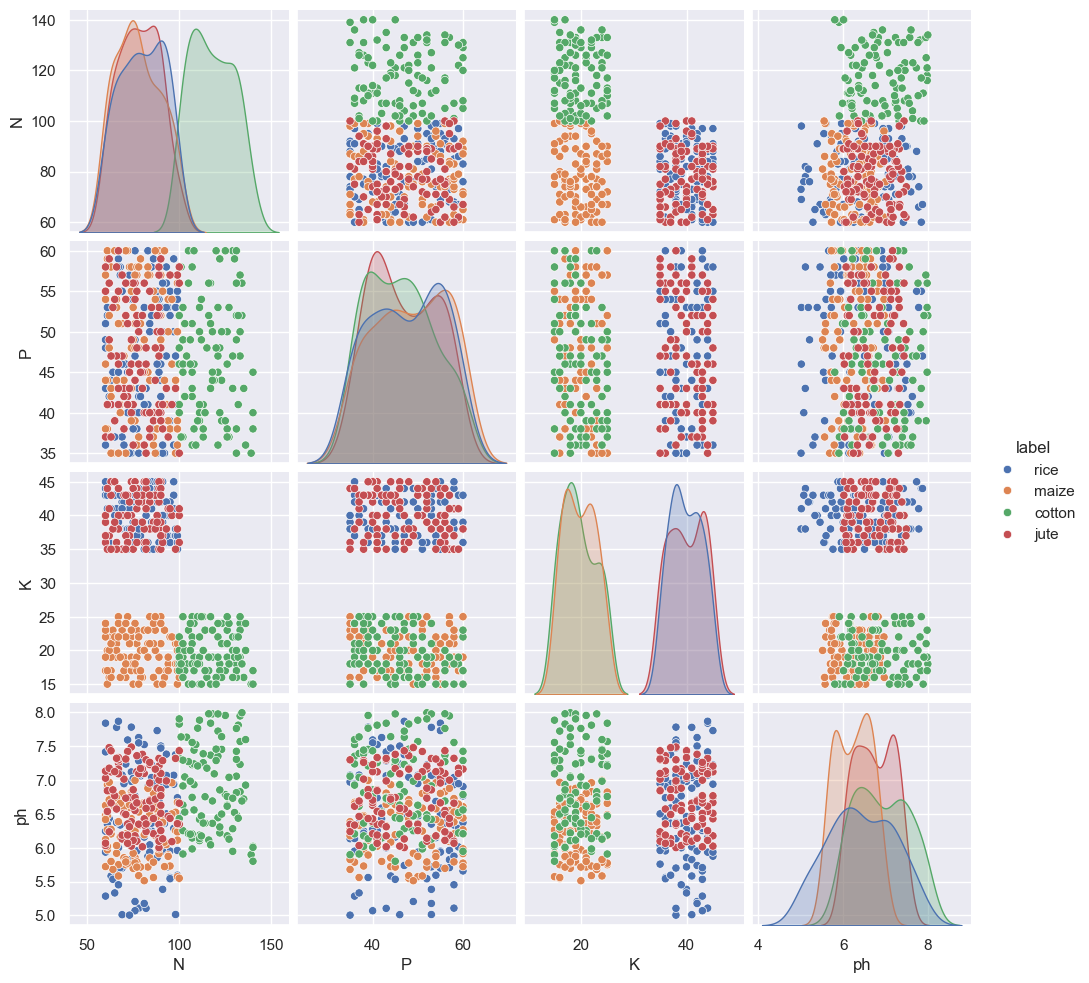

In [25]:
specific_columns=['N','P','K','ph','label']
new_df1=label_1[specific_columns]
sns.pairplot(new_df1,hue='label')
plt.show()

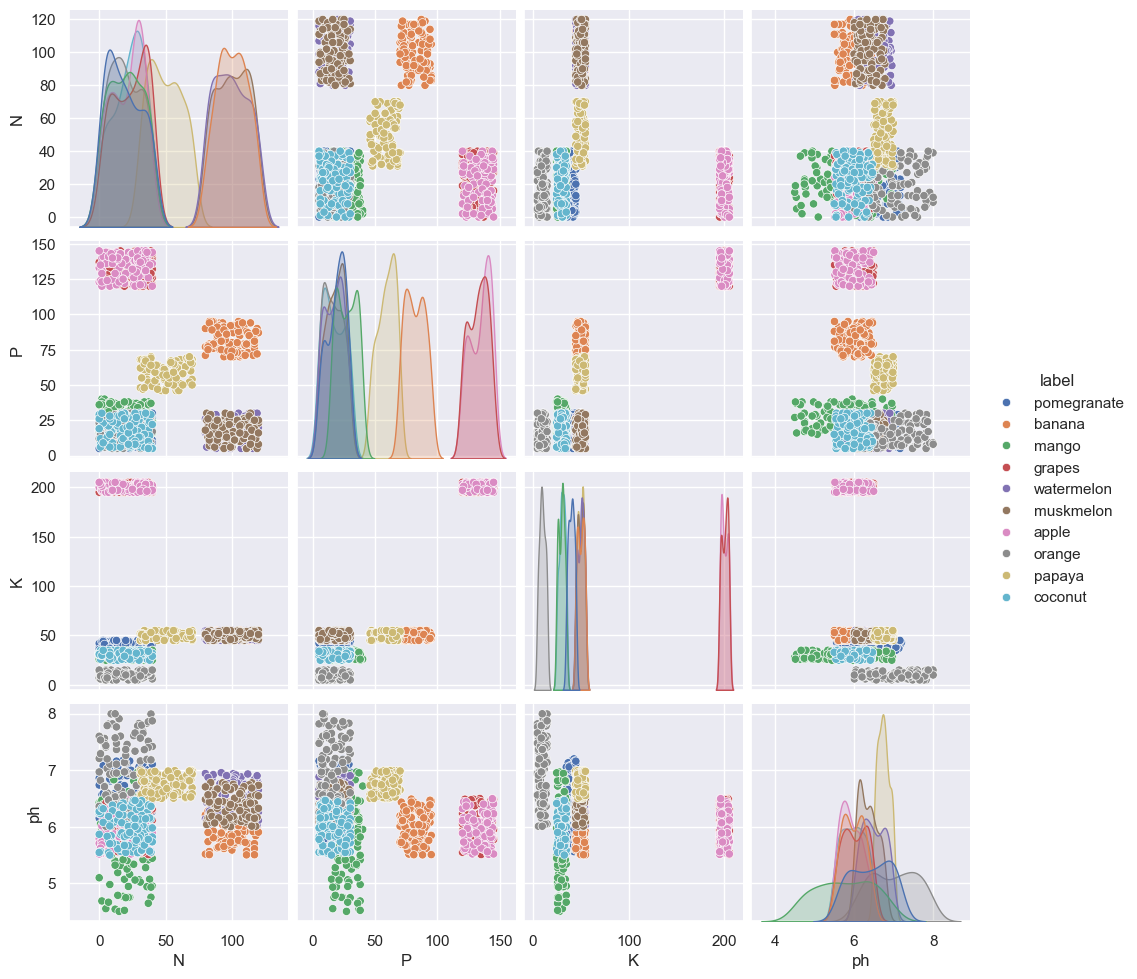

In [26]:
specific_columns=['N','P','K','ph','label']
new_df2=label_2[specific_columns]
sns.pairplot(new_df2,hue='label')
plt.show()

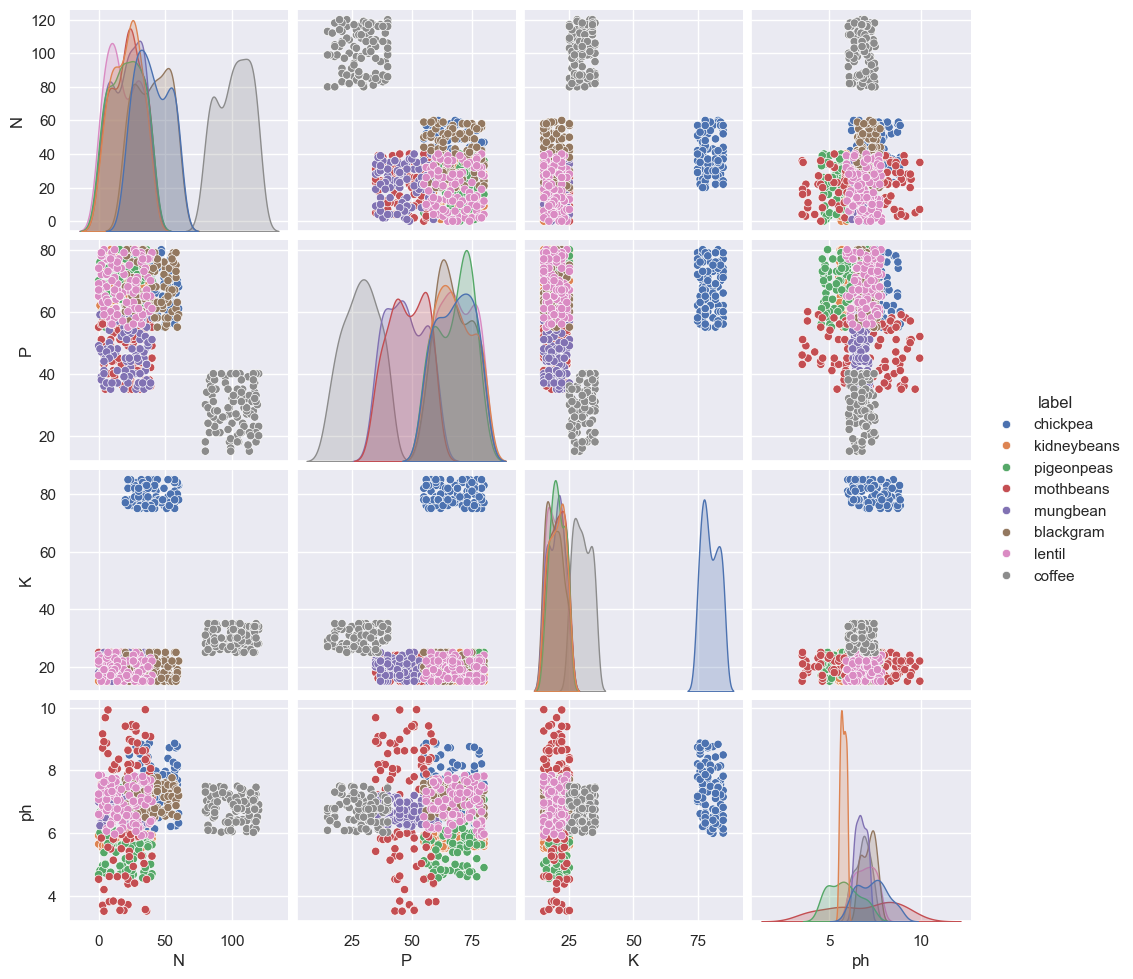

In [27]:
specific_columns=['N','P','K','ph','label']
new_df3=label_3[specific_columns]
sns.pairplot(new_df3,hue='label')
plt.show()

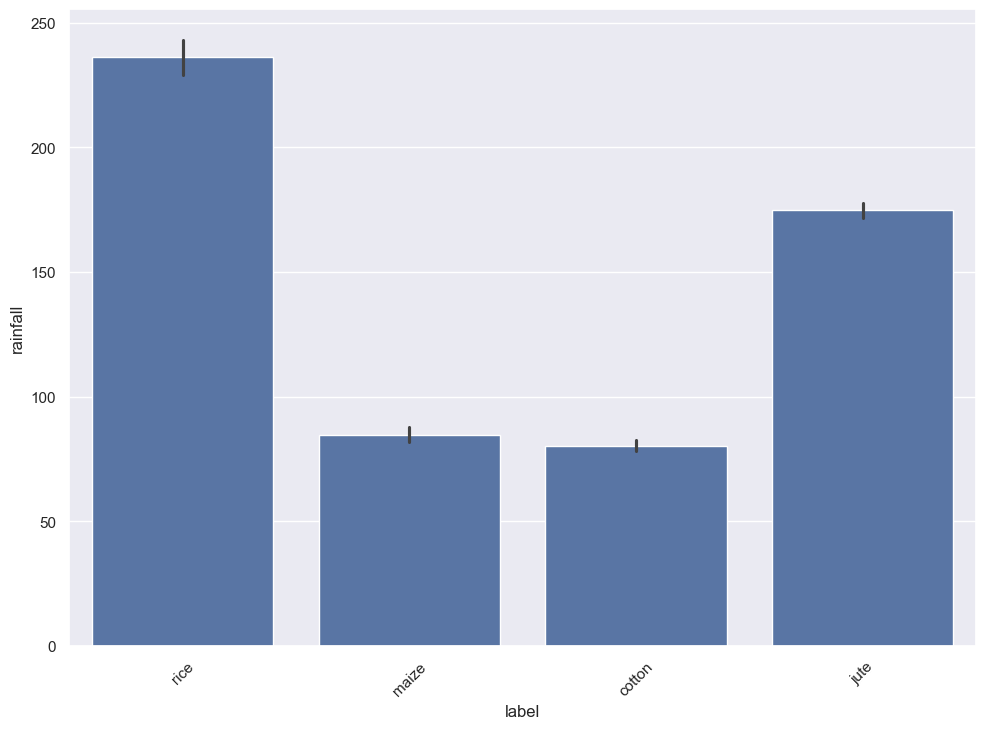

In [28]:
sns.set(style="darkgrid")
sns.set_context("notebook", rc={"figure.figsize":(3, 1)})
sns.barplot(x=label_1['label'],y=crop['rainfall'])
plt.xticks(rotation=45)
plt.show()
            

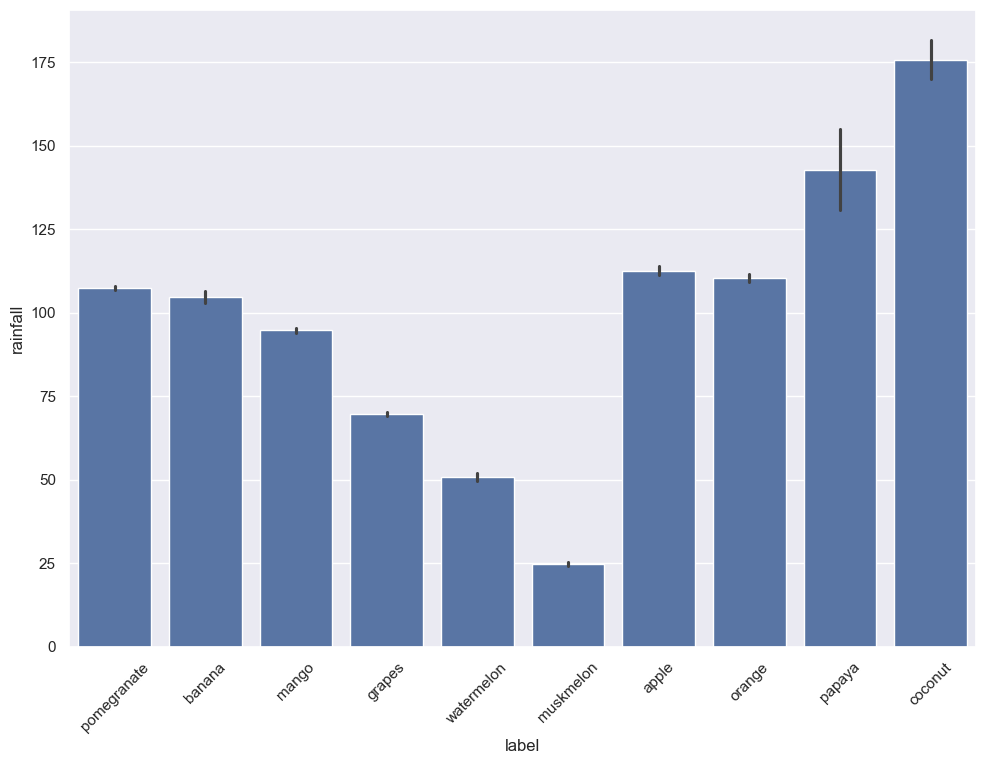

In [33]:
sns.set(style="darkgrid")
sns.set_context("notebook", rc={"figure.figsize":(3, 1)})
sns.barplot(x=label_2['label'],y=crop['rainfall'])
plt.xticks(rotation=45)
plt.show()

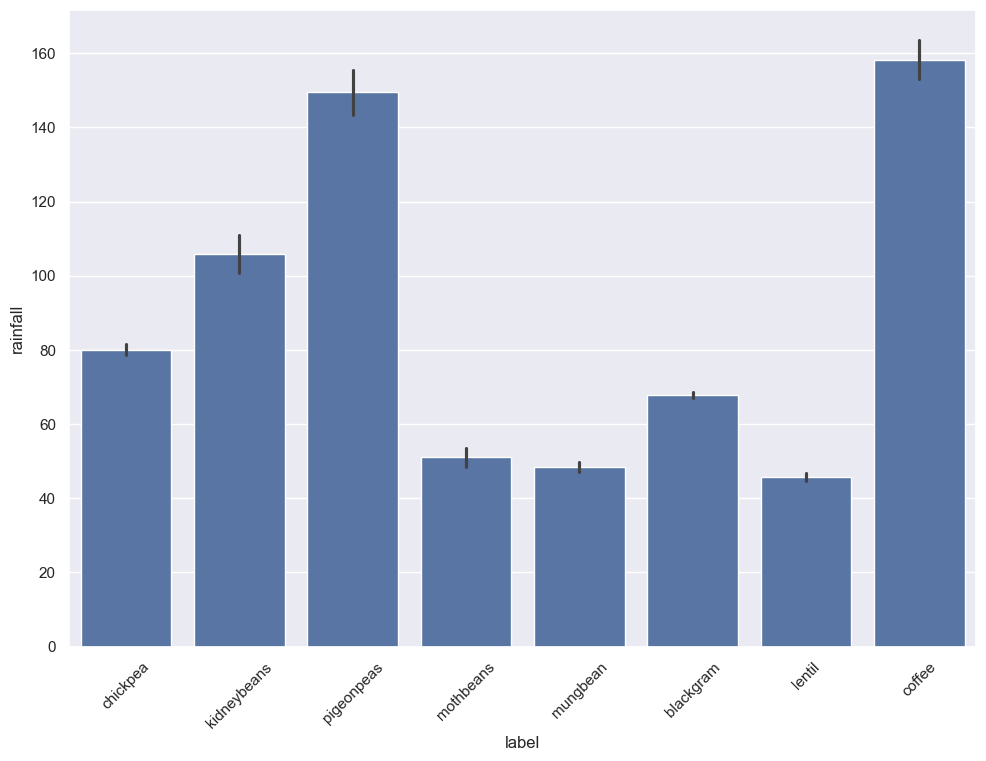

In [34]:
sns.set(style="darkgrid")
sns.set_context("notebook", rc={"figure.figsize":(3, 1)})
sns.barplot(x=label_3['label'],y=crop['rainfall'])
plt.xticks(rotation=45)
plt.show()

building necessary models for prediction

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,r2_score

In [41]:
#regression approach using random forest 

define x(features) and y(target) variables

In [42]:
x=pd.get_dummies(crop,drop_first=True) #one hot coding
y=crop[['N','P','K','ph','rainfall','temperature','humidity']]

split data into train and test data

In [43]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=42)

In [44]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [45]:
#fit values for x and y
rf.fit(train_x,train_y)

RandomForestRegressor(random_state=42)

In [46]:
#prediction
prediction=rf.predict(test_x)
print(prediction)

[[100.95        16.02        48.93       ...  25.69453565  29.15597544
   93.76864048]
 [ 95.61         9.05        50.09       ...  48.88028178  25.30144109
   86.13840814]
 [ 49.28        60.19        49.91       ... 111.95098359  35.2337421
   92.39600104]
 ...
 [ 48.16        57.66        50.92       ... 117.84658451  31.5692503
   91.48504542]
 [ 35.54        73.75        79.04       ...  69.64748     19.23146932
   16.48490203]
 [102.92        15.01        50.06       ...  52.05717711  25.20066118
   82.92177975]]


In [48]:
#evaluate the model
mse=mean_squared_error(test_y,prediction)
r2=r2_score(test_y,prediction)
print(f'mean squared error:{mse:.2f}')
print(f'r-square:{r2:.2f}')

mean squared error:10.41
r-square:0.88


In [53]:
# multiclass classification approach using KNN

define x and y variables

In [54]:
x=crop[['N','P','K','ph','rainfall','temperature','humidity']]
y=crop['label']

split data into train and test set

In [55]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=42)

In [59]:
#tofind best neighbors 
from sklearn.model_selection import cross_val_score
neighbors=range(1,20)
mean_scr=[]
for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn,train_x,train_y,cv=5,scoring='accuracy')
    mean_scr.append(np.mean(scores))
best_neighbors=neighbors[np.argmax(mean_scr)]
print(f'optimal neighbors:{best_neighbors}')

optimal neighbors:1


In [60]:
knn_classifier=KNeighborsClassifier(n_neighbors=1)

In [61]:
#fit vals for x and y
knn_classifier.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=1)

In [64]:
#prediction
prediction=knn_classifier.predict(test_x)

In [69]:
# performance metrics/evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix=confusion_matrix(test_y,prediction)
print(confusion_matrix)

[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0 31  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

in above matrix rows = true labels , cols=predicted labels, diagonal vals=correct predictions for each class , off-diagonal=misclassification

In [70]:
#accuracy 
accuracy_score=accuracy_score(test_y,prediction)
print(accuracy_score)

0.9681818181818181
